# Preparação dos dados

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import missingno as msno
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
teta = np.arange(0,20,.002)
teta

array([0.0000e+00, 2.0000e-03, 4.0000e-03, ..., 1.9994e+01, 1.9996e+01,
       1.9998e+01])

In [ ]:
x_espiral_1 = pd.Series((teta/4)*np.cos(teta))
y_espiral_1 = pd.Series((teta/4)*np.sin(teta))
x_espiral_2 = pd.Series((teta/4 + 0.8)*np.cos(teta))
y_espiral_2 = pd.Series((teta/4 + 0.8)*np.sin(teta))

In [ ]:
len(teta)

10000

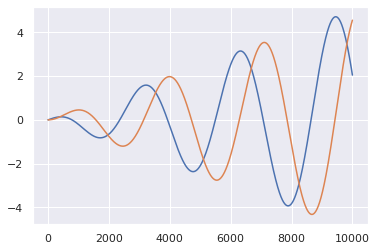

In [ ]:
plt.plot(x_espiral_1)
plt.plot(y_espiral_1)
plt.show()

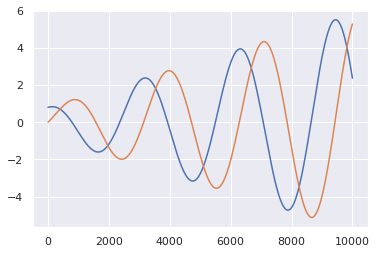

In [ ]:
plt.plot(x_espiral_2)
plt.plot(y_espiral_2)
plt.show()

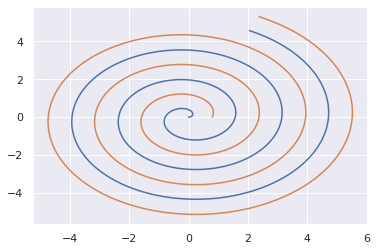

In [ ]:
plt.plot(x_espiral_1, y_espiral_1)
plt.plot(x_espiral_2, y_espiral_2)
plt.show()

In [ ]:
df1 = pd.DataFrame()
df1["x_espiral"] = x_espiral_1
df1["y_espiral"] = y_espiral_1
df1["label"] = 0

In [ ]:
df2 = pd.DataFrame()
df2["x_espiral"] = x_espiral_2
df2["y_espiral"] = y_espiral_2
df2["label"] = 1

In [ ]:
frames = [df1, df2]
df = pd.concat(frames, ignore_index=True)

In [ ]:
df.shape

(20000, 3)

In [ ]:
X = df[["x_espiral" , "y_espiral"]]
y = df["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25,
                                                    train_size=.75,
                                                    random_state=42)

# letra A

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=600)

Epoch 1/600

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

469/469 [==============================] - 1s 1ms/step - loss: 0.6643 - accuracy: 0.5791
Epoch 2/600
469/469 [==============================] - 1s 1ms/step - loss: 0.6512 - accuracy: 0.6013
Epoch 3/600
469/469 [==============================] - 1s 1ms/step - loss: 0.6506 - accuracy: 0.5931
Epoch 4/600
469/469 [==============================] - 1s 1ms/step - loss: 0.6486 - accuracy: 0.6063
Epoch 5/600
469/469 [==============================] - 1s 1ms/step - loss: 0.6490 - accuracy: 0.5923
Epo

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

157/157 - 0s - loss: 0.6028 - accuracy: 0.5654


In [ ]:
test_loss

0.6028383374214172

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions

array([[0.3754495 , 0.62455046],
       [0.82944894, 0.17055106],
       [0.335091  , 0.664909  ],
       ...,
       [0.4476874 , 0.55231255],
       [0.58033395, 0.41966602],
       [0.5675679 , 0.43243214]], dtype=float32)

In [ ]:
predictions_ = []
for i in range(len(predictions)):
  predictions_.append(np.argmax(predictions[i]))

In [ ]:
mat = tf.math.confusion_matrix(y_test, predictions_)
mat

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1321, 1203],
       [ 970, 1506]], dtype=int32)>

Text(89.18, 0.5, 'predicted label')

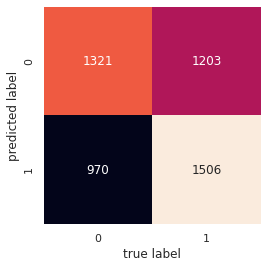

In [ ]:
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
x_certo = X_test[y_test == predictions_]
x_errado = X_test[y_test != predictions_]

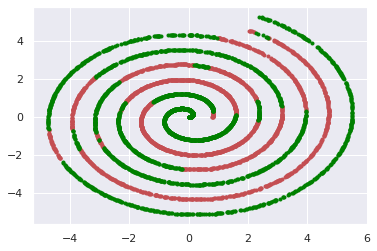

In [ ]:
plt.scatter(x_errado["x_espiral"],x_errado["y_espiral"], marker='.', color="r")
plt.scatter(x_certo["x_espiral"],x_certo["y_espiral"], marker='.', color="green")
plt.show()

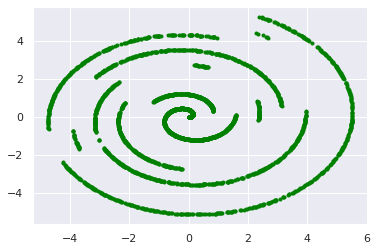

In [ ]:
plt.scatter(x_certo["x_espiral"],x_certo["y_espiral"], marker='.', color = "green")
plt.show()

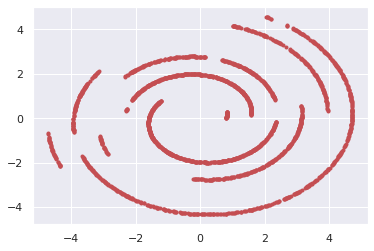

In [ ]:
plt.scatter(x_errado["x_espiral"],x_errado["y_espiral"], marker='.', color='r')
plt.show()

# letra B

In [ ]:
model_2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [ ]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model_2.fit(X_train, y_train, epochs = 600, 
											 shuffle = True, validation_split = 0.20,
                        callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
                       )

Epoch 1/600

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

375/375 [==============================] - 1s 2ms/step - loss: 0.6652 - accuracy: 0.5669 - val_loss: 0.6421 - val_accuracy: 0.5700
Epoch 2/600
375/375 [==============================] - 1s 2ms/step - loss: 0.6364 - accuracy: 0.5824 - val_loss: 0.6252 - val_accuracy: 0.6263
Epoch 3/600
375/375 [==============================] - 1s 2ms/step - loss: 0.6182 - accuracy: 0.5637 - val_loss: 0.6074 - val_accuracy: 0.5783
Epoch 4/600
375/375 [==============================] - 1s 2ms/step - loss: 0.59

In [ ]:
test_loss, test_acc = model_2.evaluate(X_test,  y_test, verbose=2)

157/157 - 0s - loss: 4.5300e-10 - accuracy: 1.0000


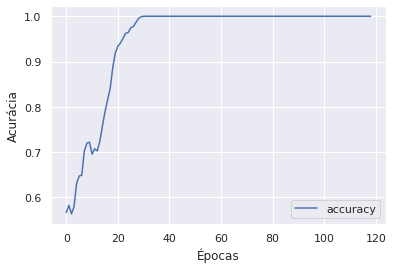

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  192       
_________________________________________________________________
dense_7 (Dense)              multiple                  2080      
_________________________________________________________________
dense_8 (Dense)              multiple                  66        
Total params: 2,338
Trainable params: 2,338
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions = model_2.predict(X_test)

In [ ]:
predictions_ = []
for i in range(len(predictions)):
  predictions_.append(np.argmax(predictions[i]))

In [ ]:
predictions_t = pd.DataFrame(predictions_).rename({0:'label'}, axis=1)
X_test_ = X_test
model_df = X_test_.join(predictions_t)

In [ ]:
x_0 = model_df[model_df.label == 0]
x_1 = model_df[model_df.label == 1]

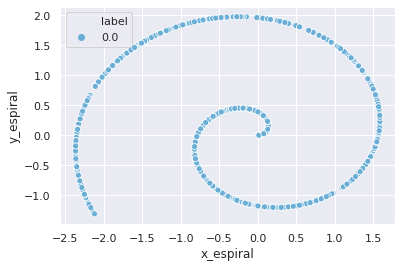

In [ ]:
sns.scatterplot(x_0['x_espiral'], x_0['y_espiral'], hue=x_0.label, palette="Blues")

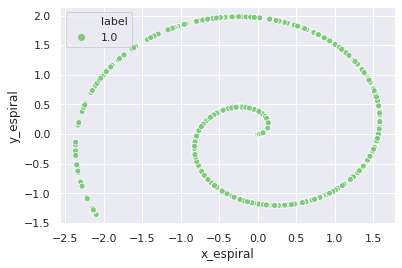

In [ ]:
sns.scatterplot(x_1['x_espiral'], x_1['y_espiral'], hue=x_1.label, palette="Accent")

In [ ]:
sns.scatterplot(model_df['x_espira'], model_df['y_espiral'], hue=model_df['label'])

In [ ]:
mat = tf.math.confusion_matrix(y_test, predictions_)
mat

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2524,    0],
       [   0, 2476]], dtype=int32)>

Text(89.18, 0.5, 'predicted label')

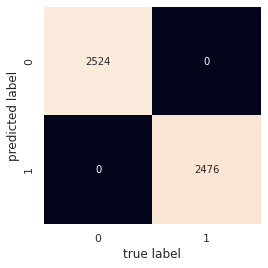

In [ ]:
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
x_certo = X_test[y_test == predictions_]
x_errado = X_test[y_test != predictions_]

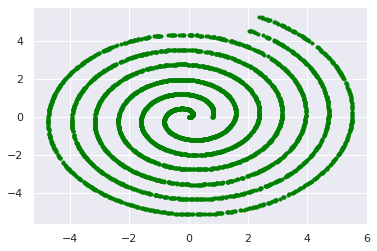

In [ ]:
plt.scatter(x_errado["x_espiral"],x_errado["y_espiral"], marker='^', color="r")
plt.scatter(x_certo["x_espiral"],x_certo["y_espiral"], marker='.', color="green")
plt.show()

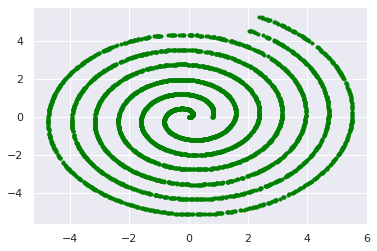

In [ ]:
plt.scatter(x_certo["x_espiral"],x_certo["y_espiral"], marker='.', color = "green")
plt.show()

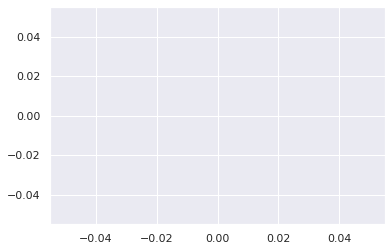

In [ ]:
plt.scatter(x_errado["x_espiral"],x_errado["y_espiral"], marker='^', color = "r")
plt.show()